<a href="https://colab.research.google.com/github/shubham-jindal/Hotel_Booking_Analysis-EDA/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Breakdown of Dataset** 

In [ ]:
# Import all necessary Libraries and packages to anyalyse the given set of data
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Define the path where data is kept
df = pd.read_csv('/content/drive/MyDrive/EDA Capstone Project 1/Hotel Bookings.csv')

In [ ]:
# Creating a copy of dataframe
df1=df.copy()

In [ ]:
# set the max columns to none
pd.set_option('display.max_columns', None)

# Taking a look at data
# Display the data of first 5 rows 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Display the data of last 5 rows 
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Put a method to check the complete information of the data
# Check the no of entries, data types, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Get the description of the data in the data frame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Check the total null values of different coloumns and sort them in ascending order
df.isnull().sum().sort_values(ascending= False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# **Printing Unique Values**



*  We have used the unique() function to find the unique elements of the dataset



In [ ]:
# Display the name of unique hotels 
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Check the coloumn of cancelled bookings to get unique values
df1['is_canceled'].unique()

array([0, 1])

In [ ]:
# To get unique values of years
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
# Check Unique countries name
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
# Get the different types of market segment
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
# Get the different types of distribution channels
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
# Get the different types of reserved rooms
df1['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
# Get the unique numbers of booking changes
df1['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [ ]:
# Print types of deposits
df1['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
# Get the 
df1['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
# Get the unique numbers of booking changes
df1['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
#Data Cleaning
df1[df1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

(87396, 32)

In [ ]:
df.isnull().sum().sort_values(ascending = False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [ ]:
df1['company'].fillna(0, inplace = True)
df1['agent'].fillna(0, inplace = True)

In [ ]:
df1['country'].fillna('Others', inplace = True)

In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

In [ ]:
df1.isnull().sum().sort_values(ascending = False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [ ]:
# Converting datetype of columns 'reservation_status_date' from object to datetime.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

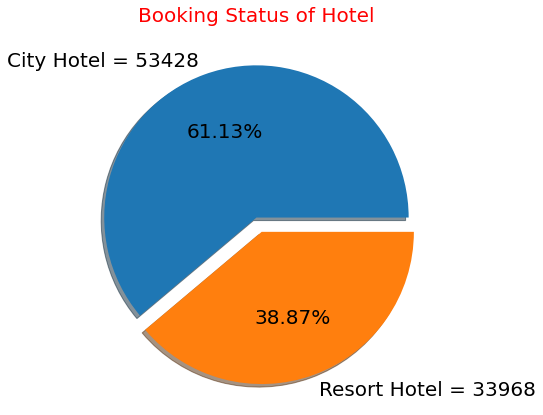

In [ ]:
total_booking = df1.groupby('hotel')['hotel'].count()
myexplode = [0,0.1]
mylabels = ['City Hotel = 53428', 'Resort Hotel = 33968']
fig = plt.figure(figsize =(7, 7))
plt.title(label='Booking Status of Hotel',fontsize=20, color='red')
plt.pie(total_booking, explode = myexplode, labels = mylabels, shadow = True, autopct='%1.2f%%', textprops={'fontsize': 20})
plt.show() 

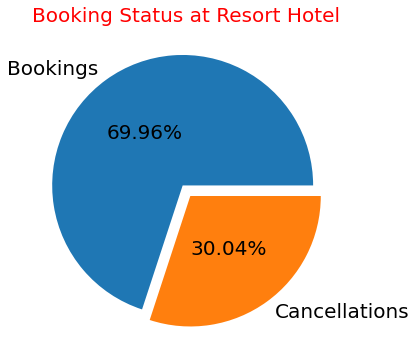

In [ ]:
# City Hotel Pie chart

resort_hotel = pd.DataFrame(df1[df1['hotel']== 'City Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at Resort Hotel',fontsize=20, color='red')
plt.pie(resort_hotel.is_canceled.value_counts(), labels=['Bookings','Cancellations'],explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

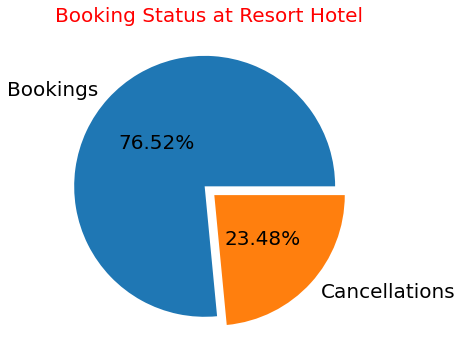

In [ ]:
# Resort Hotel Pie chart

resort_hotel = pd.DataFrame(df1[df1['hotel']== 'Resort Hotel'])
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status at Resort Hotel',fontsize=20, color='red')
plt.pie(resort_hotel.is_canceled.value_counts(), labels=['Bookings','Cancellations'],explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

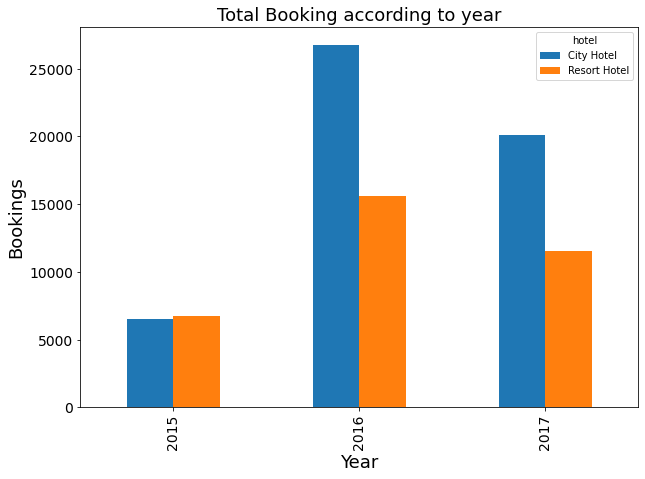

In [ ]:
booking = df1.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()

booking.plot.bar(figsize = (10,7),fontsize = 14)

plt.title('Total Booking according to year', fontsize = 18)
plt.ylabel('Bookings', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.show

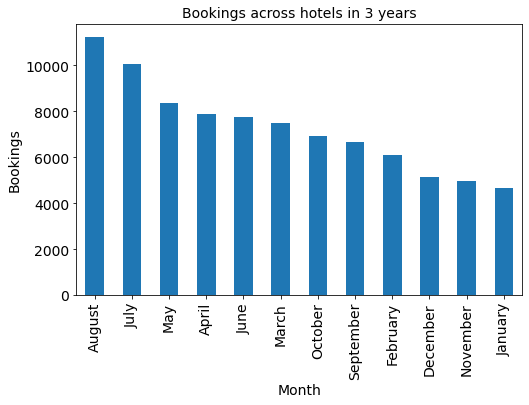

In [ ]:
busiest_month = df1['arrival_date_month'].value_counts()

busiest_month.plot.bar(figsize = (8,5),fontsize = 14)
plt.title('Bookings across hotels in 3 years',fontsize = 14 )
plt.ylabel('Bookings', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.show()

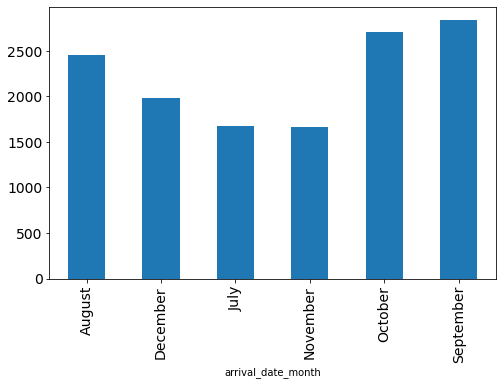

In [ ]:
year1 = df1[df1['arrival_date_year']==2015]
hotel_month = year1.groupby(['arrival_date_month']).size()
hotel_month.plot.bar(figsize = (8,5),fontsize = 14)


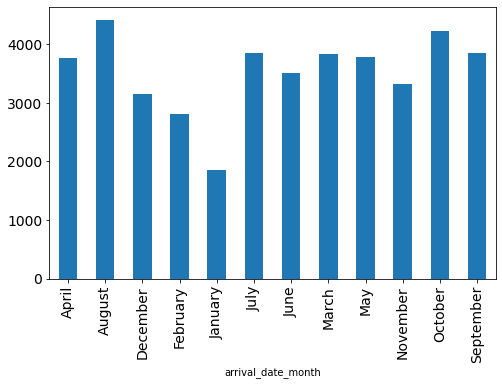

In [ ]:
year2 = df1[df1['arrival_date_year']==2016]
hotel_month = year2.groupby(['arrival_date_month']).size()
hotel_month.plot.bar(figsize = (8,5),fontsize = 14)

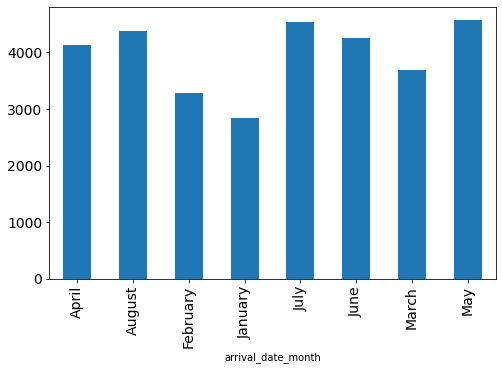

In [ ]:
year3 = df1[df1['arrival_date_year']==2017]
hotel_month = year3.groupby(['arrival_date_month']).size()
hotel_month.plot.bar(figsize = (8,5),fontsize = 14)

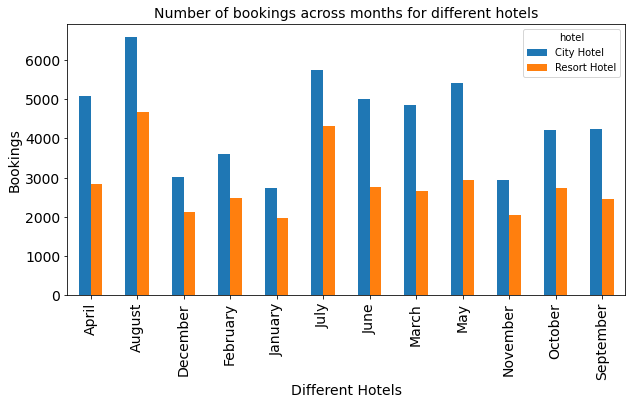

In [ ]:
hotel_month = df1.groupby(['arrival_date_month','hotel']).size().unstack()

hotel_month.plot.bar(figsize = (10,5),fontsize = 14)

plt.title('Number of bookings across months for different hotels', fontsize = 14)
plt.ylabel('Bookings', fontsize = 14)
plt.xlabel('Different Hotels', fontsize = 14)
plt.show()

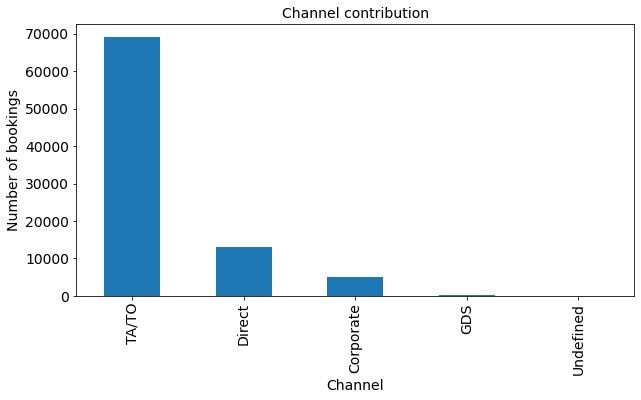

In [ ]:
channel = df1['distribution_channel'].value_counts()
channel.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Channel contribution',fontsize = 14)
plt.ylabel('Number of bookings',fontsize = 14)
plt.xlabel('Channel',fontsize = 14)
plt.show()

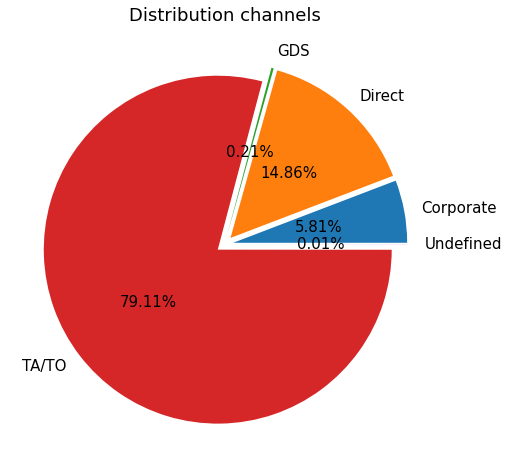

In [ ]:
d1 = pd.DataFrame(round((df1.groupby('distribution_channel').size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5, textprops={'fontsize': 15})
plt.title("Distribution channels", fontsize=18);

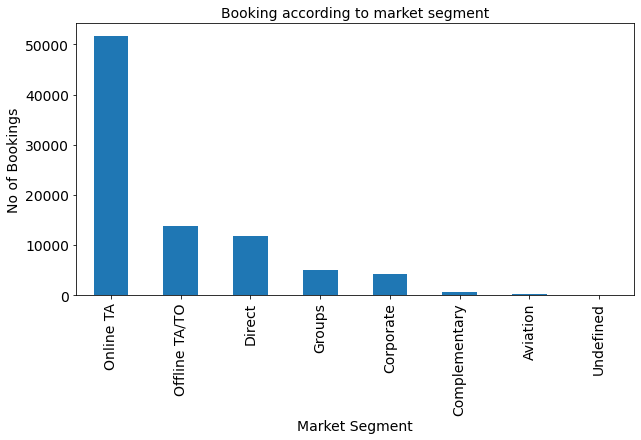

In [ ]:
channel = df1['market_segment'].value_counts()
channel.plot.bar(figsize = (10,5),fontsize = 14)
plt.title('Booking according to market segment',fontsize = 14)
plt.ylabel('No of Bookings',fontsize = 14)
plt.xlabel('Market Segment',fontsize = 14)
plt.show()

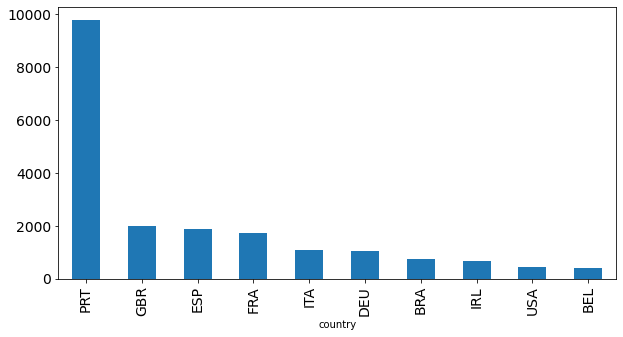

In [ ]:
cancellation_data = df1.groupby('country')['is_canceled'].sum().sort_values(ascending = False).head(10)
cancellation_data.plot.bar(figsize = (10,5),fontsize = 14)

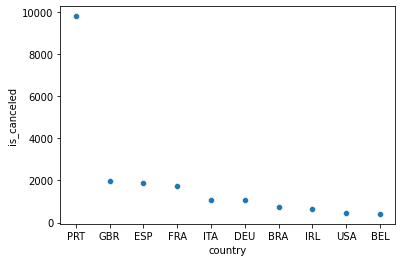

In [ ]:
sns.scatterplot(data = cancellation_data.head(10))

Assumption:- The cancellation rate must be higher incase the customer didn't get the room for which they reserved.

In [ ]:
assign_room_different = df1[df1['reserved_room_type'] != df1['assigned_room_type']]

assign_room_different = assign_room_different.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number','arrival_date_day_of_month',
  'stays_in_weekend_nights','stays_in_week_nights',	'adults', 'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel','is_repeated_guest',
  'previous_cancellations',	'previous_bookings_not_canceled'])

assign_room_different.head(2)

,hotel,is_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
12,Resort Hotel,0,D,E,0,No Deposit,240,0,0,Transient,97.0,0,3,Check-Out,2015-07-05


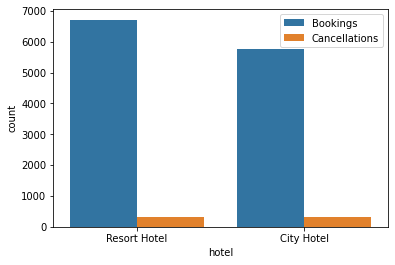

In [ ]:
b_ch = sns.countplot(data=assign_room_different, x='hotel', hue='is_canceled')
b_ch.legend(['Bookings','Cancellations'])

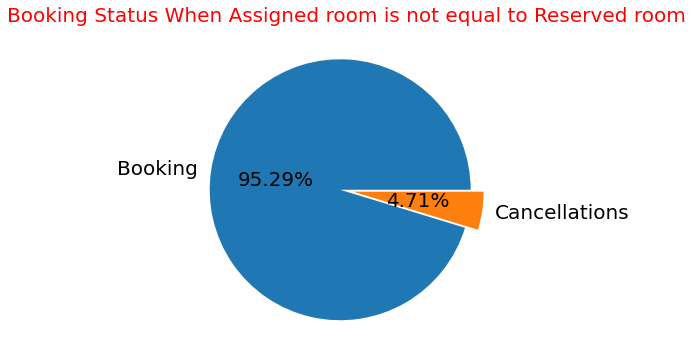

In [ ]:
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is not equal to Reserved room',fontsize=20, color='red')
plt.pie(assign_room_different.is_canceled.value_counts(), labels=['Booking','Cancellations'], explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

In [ ]:
assign_room_same = df1[df1['reserved_room_type'] == df1['assigned_room_type']]

assign_room_same = assign_room_same.drop(columns=['lead_time',	'arrival_date_year',	'arrival_date_month',	'arrival_date_week_number',\
                        'arrival_date_day_of_month',	'stays_in_weekend_nights','stays_in_week_nights',	'adults',\
                        'children',	'babies',	'meal',	'country',	'market_segment','distribution_channel',\
                        'is_repeated_guest',	'previous_cancellations',	'previous_bookings_not_canceled'])
assign_room_same.head(2)


,hotel,is_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01


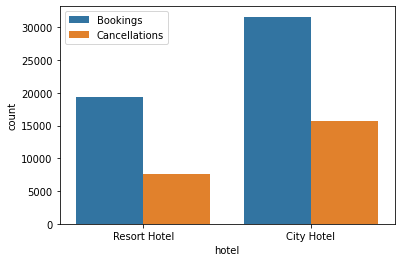

In [ ]:
b_ch = sns.countplot(data=assign_room_same, x='hotel', hue='is_canceled')
b_ch.legend(['Bookings','Cancellations'])

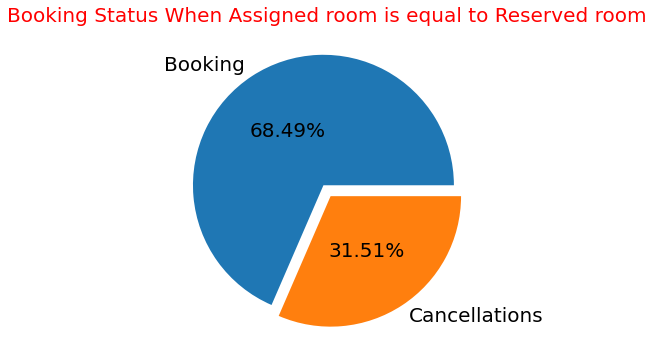

In [ ]:
plt.figure(figsize=((6,6)))
plt.title(label='Booking Status When Assigned room is equal to Reserved room',fontsize=20, color='red')
plt.pie(assign_room_same.is_canceled.value_counts(), labels=['Booking','Cancellations'], explode=[0.05]*2, autopct='%1.2f%%', pctdistance=0.5, textprops={'fontsize': 20})
plt.show()

In [ ]:
adr1 = df1.groupby(['arrival_date_month','distribution_channel'])['adr'].mean().unstack()

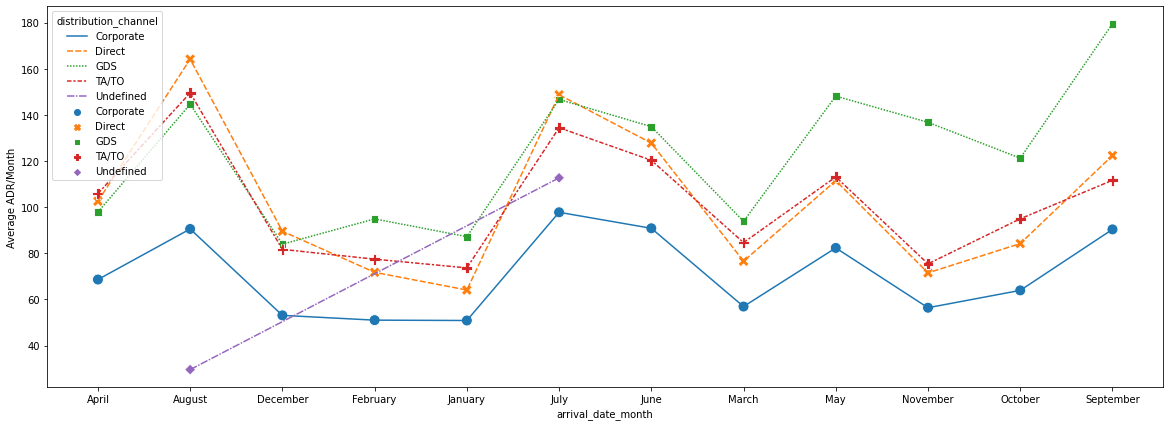

In [ ]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.scatterplot(data = adr1,s=120)
f = sns.lineplot(data = adr1)
f.set(ylabel='Average ADR/Month')
plt.show()

In [ ]:
Rep_guests = df1.groupby(['arrival_date_month','distribution_channel'])['is_repeated_guest'].sum().unstack()

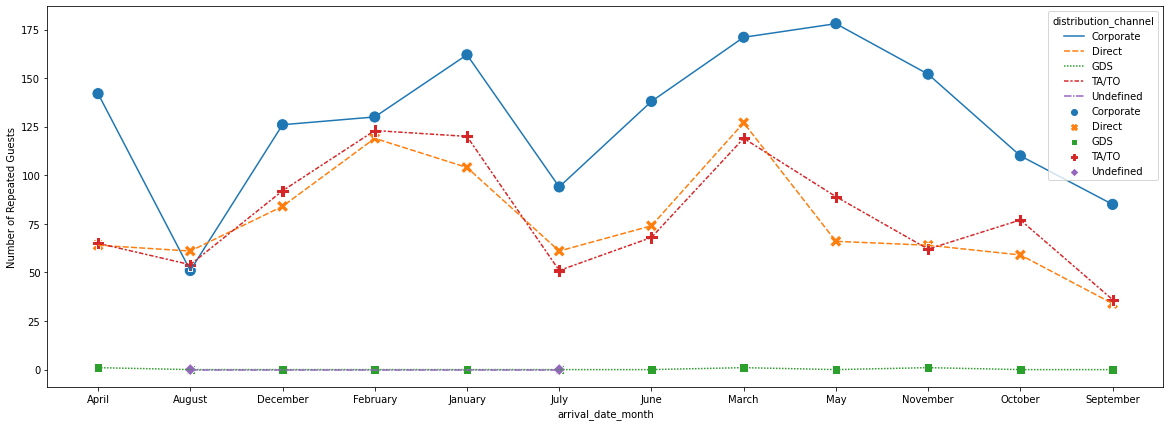

In [ ]:
g = sns.scatterplot(data = Rep_guests,s=150)
f = sns.lineplot(data = Rep_guests)
f.set(ylabel='Number of Repeated Guests')
plt.show()

In [ ]:
Spec_request = df1.groupby(['arrival_date_month','distribution_channel'])['total_of_special_requests'].sum().unstack()

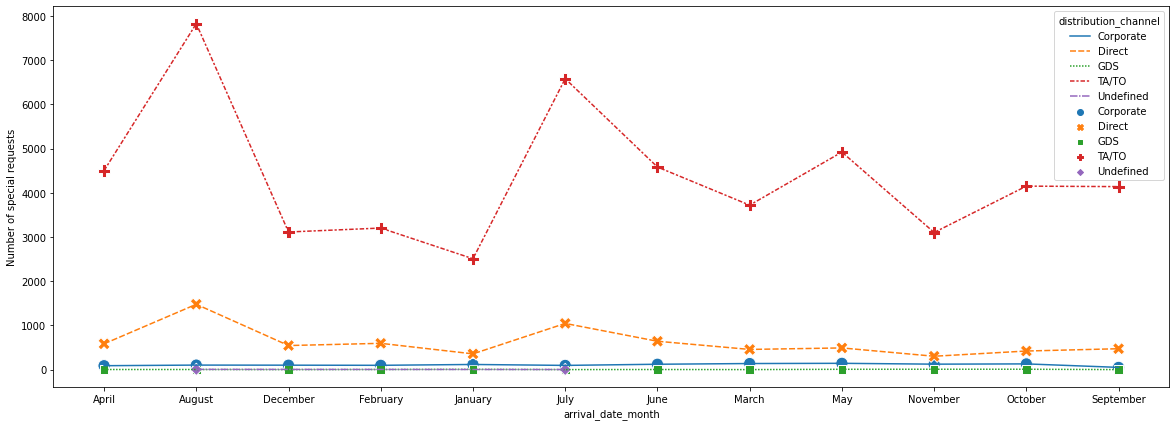

In [ ]:
g = sns.scatterplot(data = Spec_request,s=150)
f = sns.lineplot(data = Spec_request)
f.set(ylabel='Number of special requests')
plt.show()

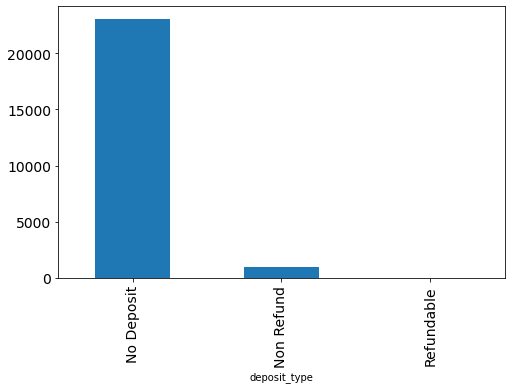

In [ ]:
Deposit_type = df1[df1['is_canceled']==1]
Comparision = Deposit_type.groupby(['deposit_type']).size()
Comparision.plot.bar(figsize = (8,5),fontsize = 14)
plt.show()

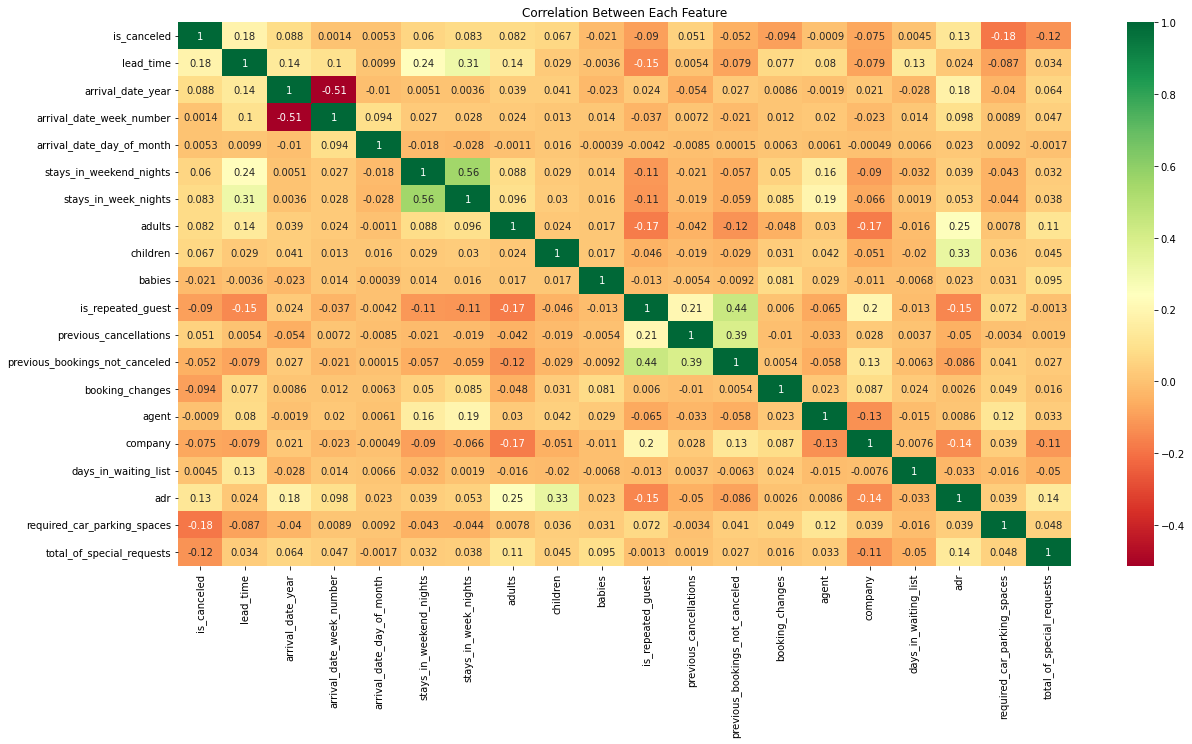

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), cmap = 'RdYlGn', annot = True)
plt.title("Correlation Between Each Feature")

plt.show()


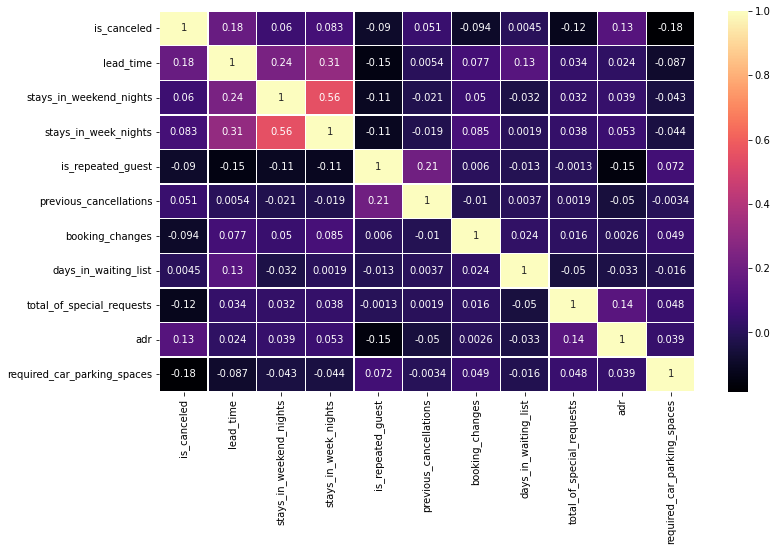

In [ ]:

co_releation = pd.DataFrame(df1.loc[:, ['is_canceled', 'lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',\
                                 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests',\
                                 'adr', 'required_car_parking_spaces' ]])
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(co_releation.corr(), cmap ='magma', linewidths = 0.30, annot=True )
plt.show()

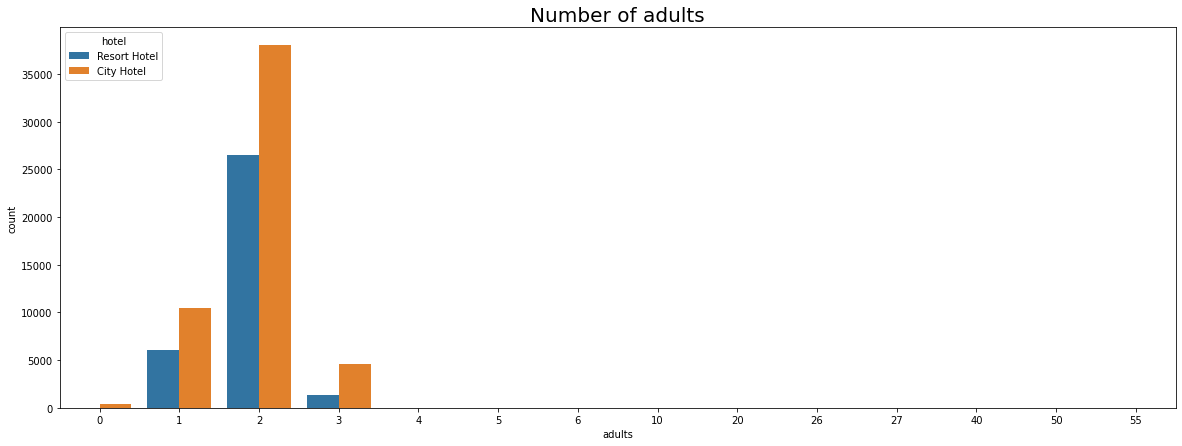

In [ ]:
sns.countplot(data = df1, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)
plt.show()